<h1 style="text-align:center;">EN2550: Assignment 03 on Object Counting on a Conveyor Belt </h1>
<h1 style="text-align:center;">Name - M. D. A. J. Abeyratne </h1>
<h1 style="text-align:center;">Index Number - 190009U </h1>

## Connected Component Analysis

### Question 1

Open the `hexnut_template.png`, `squarenut_template.png` and `conveyor_f100.png` and display. This is done for you.

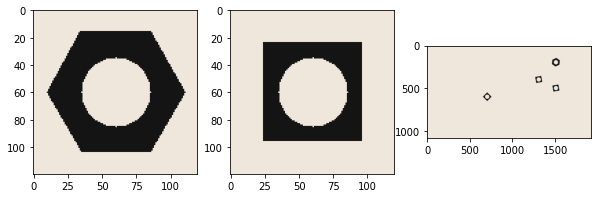

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template = cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)


fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### Question 2


Convert the images to grayscale and apply Otsu's thresholding to
    obtain the binarized image. Do this for both the templates and belt
    images. See
    <https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html>
    for a guide. State the threshold value (automatically) selected in
    the operation. Display the output images.

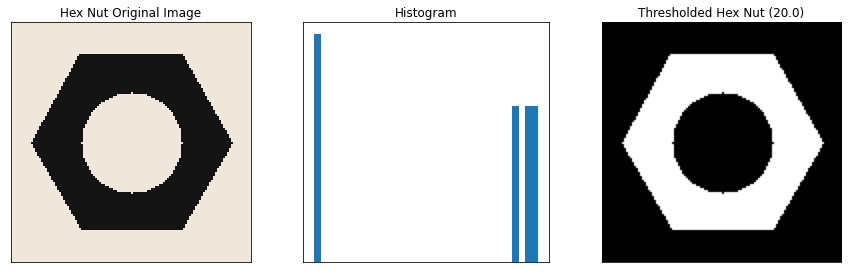

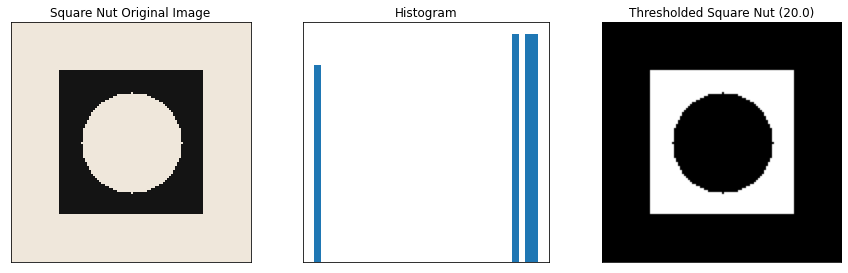

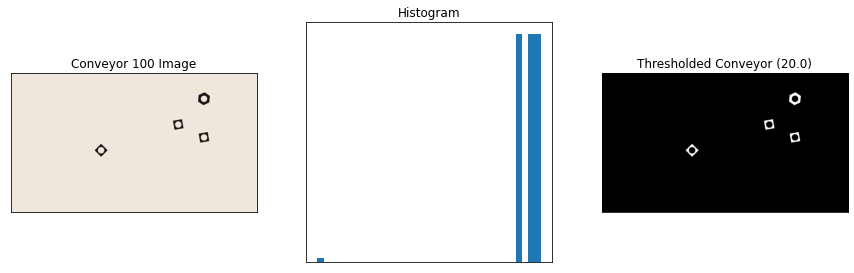

In [2]:
#Your Code Here
hex_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
sqr_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
con_100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret_hex, thresh_hex = cv.threshold(hex_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
ret_sqr, thresh_sqr = cv.threshold(sqr_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
ret_con_100, thresh_con_100 = cv.threshold(con_100_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

#The image is inverted because for the detect contours, the object should be white, in a black background.

images = [ hexnut_template, 0, thresh_hex,
           squarenut_template, 0, thresh_sqr,
           conveyor_f100, 0, thresh_con_100]

titles = [ "Hex Nut Original Image", "Histogram", f"Thresholded Hex Nut ({ret_hex})",
           "Square Nut Original Image", "Histogram", f"Thresholded Square Nut ({ret_sqr})",
           "Conveyor 100 Image", "Histogram", f"Thresholded Conveyor ({ret_con_100})"]

for i in range(3):
    plt.figure(figsize=(15,15))
    plt.subplot(3,3,i*3+1), plt.imshow(cv.cvtColor(images[i*3], cv.COLOR_BGR2RGB)),
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(), 35)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+3), plt.imshow(cv.cvtColor(images[i*3+2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])


### Question 3

Carry out morphological closing to remove small holes inside the
    foreground. Use a $3 \times 3$ kernel. See
    <https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html>
    for a guide.

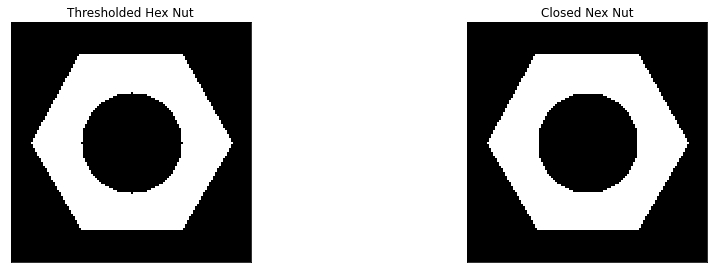

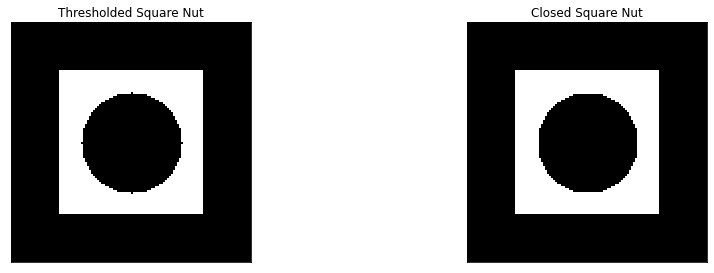

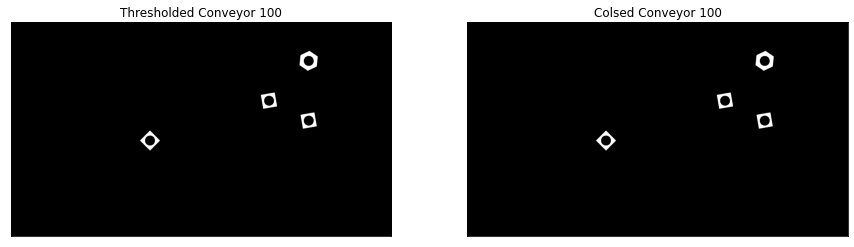

In [3]:
#Your Code Here
kernel = np.ones((3,3),np.uint8)
#The morphology transdormation "Closing" is required to close small holes
close_hex = cv.morphologyEx(thresh_hex, cv.MORPH_CLOSE, kernel)
close_sqr = cv.morphologyEx(thresh_sqr, cv.MORPH_CLOSE, kernel)
close_con_100 = cv.morphologyEx(thresh_con_100, cv.MORPH_CLOSE, kernel)


images = [ thresh_hex, close_hex,
           thresh_sqr, close_sqr,
           thresh_con_100, close_con_100]
titles = [ "Thresholded Hex Nut", "Closed Nex Nut",
           "Thresholded Square Nut", "Closed Square Nut",
           "Thresholded Conveyor 100", "Colsed Conveyor 100"]

for i in range(3):
    plt.figure(figsize=(15,15))
    plt.subplot(3,2,i*2+1), plt.imshow(cv.cvtColor(images[i*2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,2,i*2+2), plt.imshow(cv.cvtColor(images[i*2+1], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2+1]), plt.xticks([]), plt.yticks([])

### Question 4

Connected components analysis: apply the
    `connectedComponentsWithStats` function (see
    <https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f>)
    and display the outputs as colormapped images. Answer the following
    questions

-   How many connected components are detected in each image?
-   What are the statistics? Interpret these statistics.
-   What are the centroids?

For the hexnut template, you should get the object area in pixel as
approximately `4728`.

In [4]:
#Your Code Here
connectivity = 4
retval_hex, labels_hex, stats_hex, centroids_hex = cv.connectedComponentsWithStats(close_hex, connectivity, cv.CV_32S)
retval_sqr, labels_sqr, stats_sqr, centroids_sqr = cv.connectedComponentsWithStats(close_sqr, connectivity, cv.CV_32S)
retval_con_100, labels_con_100, stats_con_100, centroids_con_100 = cv.connectedComponentsWithStats(close_con_100, connectivity, cv.CV_32S)

In [5]:
print("Hexnut Template")
print("Number of connected components in the hex nut: ", retval_hex)
for r in range(retval_hex):
    print("\nComponent ",r+1)
    print(stats_hex[r][0],'\t',": Leftmost (x) coordinate")
    print(stats_hex[r][1],'\t',": Topmost (y) coordinate")
    print(stats_hex[r][2],'\t',": Horizontal size of bounding box")
    print(stats_hex[r][3],'\t',": Vertical size of bounding box")
    print(stats_hex[r][4],'\t',": Total area of connected components in pixels")
for r in range(retval_hex):
    print("Centroid of component {}:".format(r+1), centroids_hex[r])

print("\nSquarenut Template")
print("Number of connected component in the square nut: ", retval_sqr)
for r in range(retval_sqr):
    print("\nComponent ",r+1)
    print(stats_sqr[r][0],'\t',": Leftmost (x) coordinate")
    print(stats_sqr[r][1],'\t',": Topmost (y) coordinate")
    print(stats_sqr[r][2],'\t',": Horizontal size of bounding box")
    print(stats_sqr[r][3],'\t',": Vertical size of bounding box")
    print(stats_sqr[r][4],'\t',": Total area of connected components in pixels")
for r in range(retval_sqr):
    print("Centroid of component {}: ".format(r+1), centroids_sqr[r])
print("\nConveyor_f100")
print("Number of connected components in the conveyor 100: ", retval_con_100)
for r in range(retval_con_100):
    print("\nComponent ",r+1)
    print(stats_con_100[r][0],'\t',": Leftmost (x) coordinate")
    print(stats_con_100[r][1],'\t',": Topmost (y) coordinate")
    print(stats_con_100[r][2],'\t',": Horizontal size of bounding box")
    print(stats_con_100[r][3],'\t',": Vertical size of bounding box")
    print(stats_con_100[r][4],'\t',": Total area of connected components in pixels")
print("")
for r in range(retval_con_100):
    print("Centroid of component {}: ".format(r+1), centroids_con_100[r])

Hexnut Template
Number of connected components in the hex nut:  2

Component  1
0 	 : Leftmost (x) coordinate
0 	 : Topmost (y) coordinate
120 	 : Horizontal size of bounding box
120 	 : Vertical size of bounding box
9672 	 : Total area of connected components in pixels

Component  2
10 	 : Leftmost (x) coordinate
16 	 : Topmost (y) coordinate
101 	 : Horizontal size of bounding box
88 	 : Vertical size of bounding box
4728 	 : Total area of connected components in pixels
Centroid of component 1: [59.33684864 59.63513234]
Centroid of component 2: [59.83375635 59.22356176]

Squarenut Template
Number of connected component in the square nut:  2

Component  1
0 	 : Leftmost (x) coordinate
0 	 : Topmost (y) coordinate
120 	 : Horizontal size of bounding box
120 	 : Vertical size of bounding box
11173 	 : Total area of connected components in pixels

Component  2
24 	 : Leftmost (x) coordinate
24 	 : Topmost (y) coordinate
72 	 : Horizontal size of bounding box
72 	 : Vertical size of bound

### Question 5

Contour analysis: Use `findContours` function to retrieve the
    *extreme outer* contours. (see
    <https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html>
    for help and
    <https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0>
    for information.

Display these contours. You should see something like the following:

<img src="extreme_outer_contours.png" alt="Extreme Outer Contours" style="height: 270px; width:480px;"/>

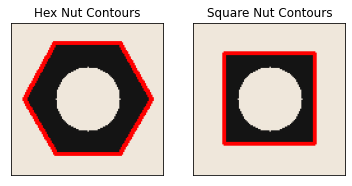

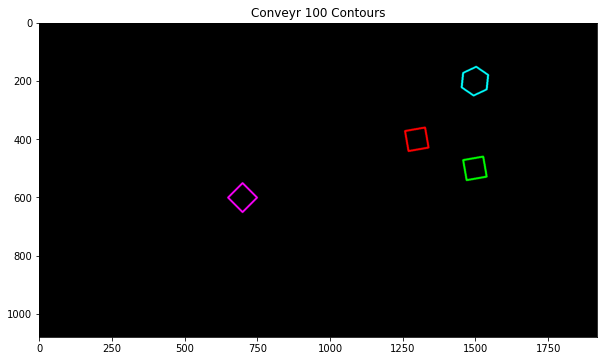

In [6]:
#Your Code Here
hex_contours, hierarchy_hex	=	cv.findContours(close_hex, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
sqr_contours, hierarchy_sqr	=	cv.findContours(close_sqr, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

hex_cont_img = hexnut_template.copy()
sqr_cont_img = squarenut_template.copy()

cv.drawContours(hex_cont_img, hex_contours, 0, (0,0,255), 2)
cv.drawContours(sqr_cont_img, sqr_contours, 0, (0,0,255), 2)

images = ( hex_cont_img, sqr_cont_img )
titles = ("Hex Nut Contours", "Square Nut Contours")

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i]), plt.xticks([]), plt.yticks([]) 
plt.show()

plt.figure(figsize=(10,10))
plt.title("Conveyr 100 Contours")

con_100_contours, hierarchy = cv.findContours(close_con_100, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
con_copy=cv.cvtColor(close_con_100.copy(),cv.COLOR_BGR2RGB)

black_bg=np.zeros(conveyor_f100.shape,dtype=int)
colors=[(255,0,255),(0,255,0),(255,0,0),(0,255,255)]
for i in range(len(con_100_contours)):
    cv.drawContours(black_bg,con_100_contours,i,colors[i],5)
plt.imshow(black_bg)
plt.show()

## Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic `conveyor.mp4` sequence to
count the two types of nuts.

Open the sequence and play it using the code below.

In [7]:
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame: ' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


### Question 6

Count the number of matching hexagonal nuts in `conveyor_f100.png`.
    You can use `matchCountours` function as shown in
    <https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html>
    to match contours in each frame with that in th template.

Count the number of objects that were conveyed along the conveyor
    belt: Display the count in the current frame and total count upto
    the current frame in the output video. Please compress your video
    (using Handbreak or otherwise) before uploading. It would be good to
    experiment first with the two adjacent frames `conveyor_f100.png`
    and `conveyor_f101.png`. In order to disregard partially appearing
    nuts, consider comparing the contour area in addition to using the
    `matchCountours` function.

In [8]:
total_matches = 0
for i in range(len(con_100_contours)):
    ret = cv.matchShapes(con_100_contours[0], con_100_contours[i], 1, 0.0)
    if ret==0.0:
        total_matches+=1
print("Number of Hexagonal Nuts: ",total_matches)

Number of Hexagonal Nuts:  1


In [9]:
def Hex_Count(hex_con, vid_frame):
    global hexnut_count
    global ref
    
    vid_frame_gray = cv.cvtColor(vid_frame, cv.COLOR_BGR2GRAY)
    ret_vid_frame, thresh_vid_frame = cv.threshold(vid_frame_gray, 0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

    thresh_vid_frame = cv.bitwise_not(thresh_vid_frame)
    
    close_vid_frame = cv.morphologyEx(thresh_vid_frame, cv.MORPH_CLOSE, np.ones((3,3)))
    vid_frame_contours, hierarchy_vid_frame = cv.findContours(close_vid_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    hex_count= 0
    ref_ = 0
    for i in vid_frame_contours:
        cen_hex = min(i[:,0,0])
        ret_vid_frame = cv.matchShapes(hex_con[0], i, 1, 0.0)
        if ret_vid_frame < 0.002:
            hex_count+=1
            if ref_ < cen_hex:
                ref_ = cen_hex
            if cen_hex > ref:
                hexnut_count += 1

    if any([hex_count]):
        ref = ref_
    return hex_count

In [10]:
frames = []
shape = (1080, 1920, 3)

hexnut_count, ref = 0, 0

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f_num = 0
frame = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    hex_c = Hex_Count(hex_contours, frame)
    f_num += 1

    text1 = "Frame: " + str(f_num)
    text2 = "Hexagonal Nuts in the current frame = " + str(hex_c)
    text3 = "Total Hexagonal Nuts = " + str(hexnut_count)

    cv.putText(frame, text1, (50, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)
    cv.putText(frame, text2, (50, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    cv.putText(frame, text3, (50, 150), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    frames.append(frame)

    if cv.waitKey(1) == ord('q'):
        break
    
cap.release()
out = cv.VideoWriter('conveyor_result_190009U.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
cv.destroyAllWindows()
 
for i in range(len(frames)):
    cv.imshow('Frame', frames[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frames[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


### Github Link
https://github.com/akilaabeyratne/EN2550-Assignment-3